# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('email.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
data.duplicated().sum()

415

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data['spam'] = data['Category'].apply(lambda x:1 if x=='spam' else 0)

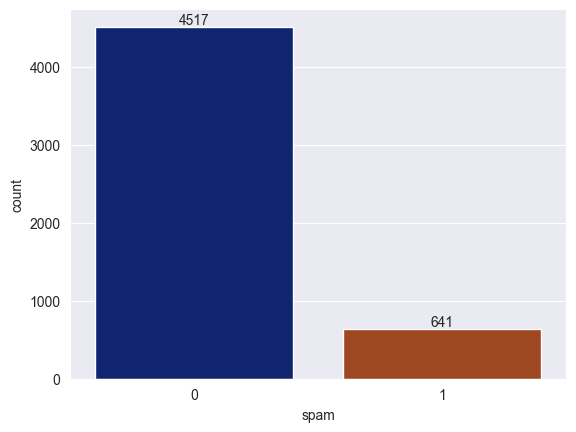

In [8]:
ax = sns.countplot(x='spam',data=data,palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
data['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

# Text Preprocessing

- lowercase
- remove punctuation
- remove stopwords
- stemming

In [10]:
import string

def preprocessing(text):
    text = text.lower()
    
    for txt in text:
        if txt in string.punctuation:
            text = text.replace(txt,"").strip()
            
    return text  

In [11]:
data['Message'] = data['Message'].apply(preprocessing)

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    keep_words = []
    for words in text.split():
        if words not in stop_words:
            keep_words.append(words)
    return ' '.join(keep_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
remove_stopwords("im gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today")

'im gonna home soon dont want talk stuff anymore tonight k ive cried enough today'

In [14]:
data['Message'] = data['Message'].apply(remove_stopwords)

In [15]:
# data['num_of_char'] = data['Message'].apply(len)

In [16]:
# data['word_count'] = data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [17]:
# data['sent_count'] = data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def steaming(text):
    text = nltk.word_tokenize(text)
    
    lst = []
    for i in text:
        lst.append(ps.stem(i))
    return ' '.join(lst)

In [19]:
steaming("im gonna home soon dont want talk stuff anymore tonight k ive cried enough today")

'im gon na home soon dont want talk stuff anymor tonight k ive cri enough today'

In [20]:
data['Message'] = data['Message'].apply(steaming)

In [21]:
data.drop(columns=['Category'],inplace=True)
data.rename(columns={'spam':'Target'},inplace=True)

# EDA  (Exploratory data analysis)

In [22]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

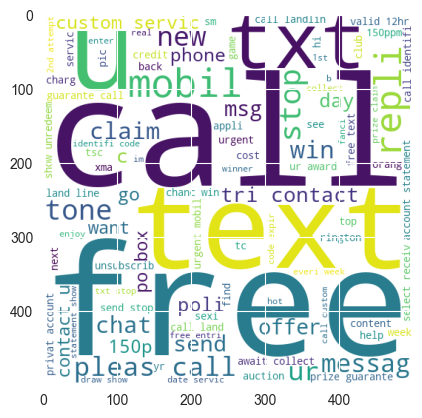

In [23]:
spam_wc = wc.generate(data[data['Target']==1]['Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

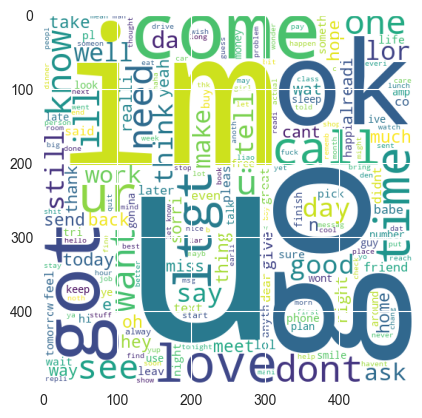

In [24]:
ham_wc = wc.generate(data[data['Target']==0]['Message'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [25]:
data['Message'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [26]:
spam_corpus = []
for msg in data[data['Target'] == 1]['Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [27]:
len(spam_corpus)

10620

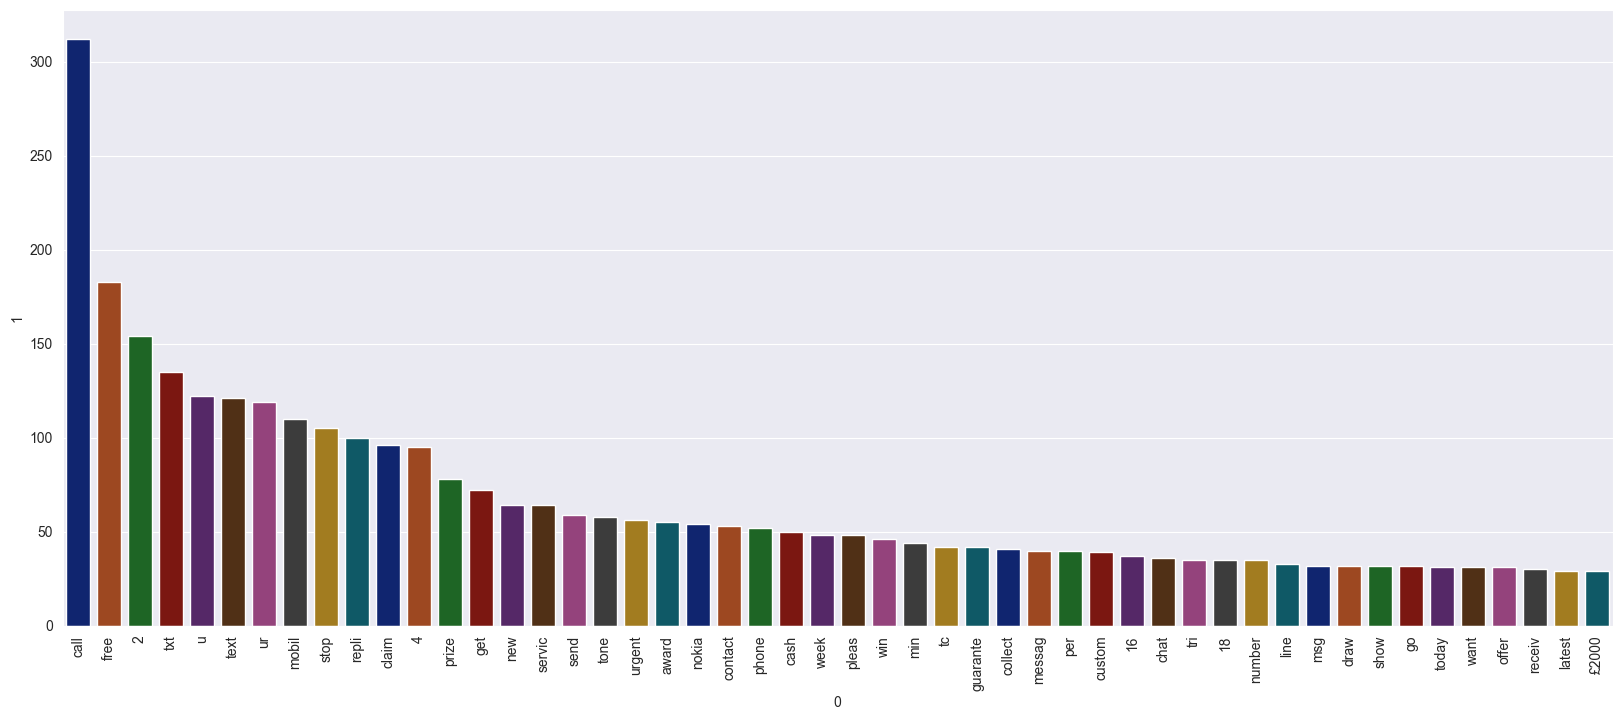

In [28]:
from collections import Counter
plt.figure(figsize=(20,8))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1],palette='dark')
plt.xticks(rotation=90)
plt.show()

In [29]:
ham_corpus = []
for msg in data[data['Target'] == 0]['Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [30]:
len(ham_corpus)

37448

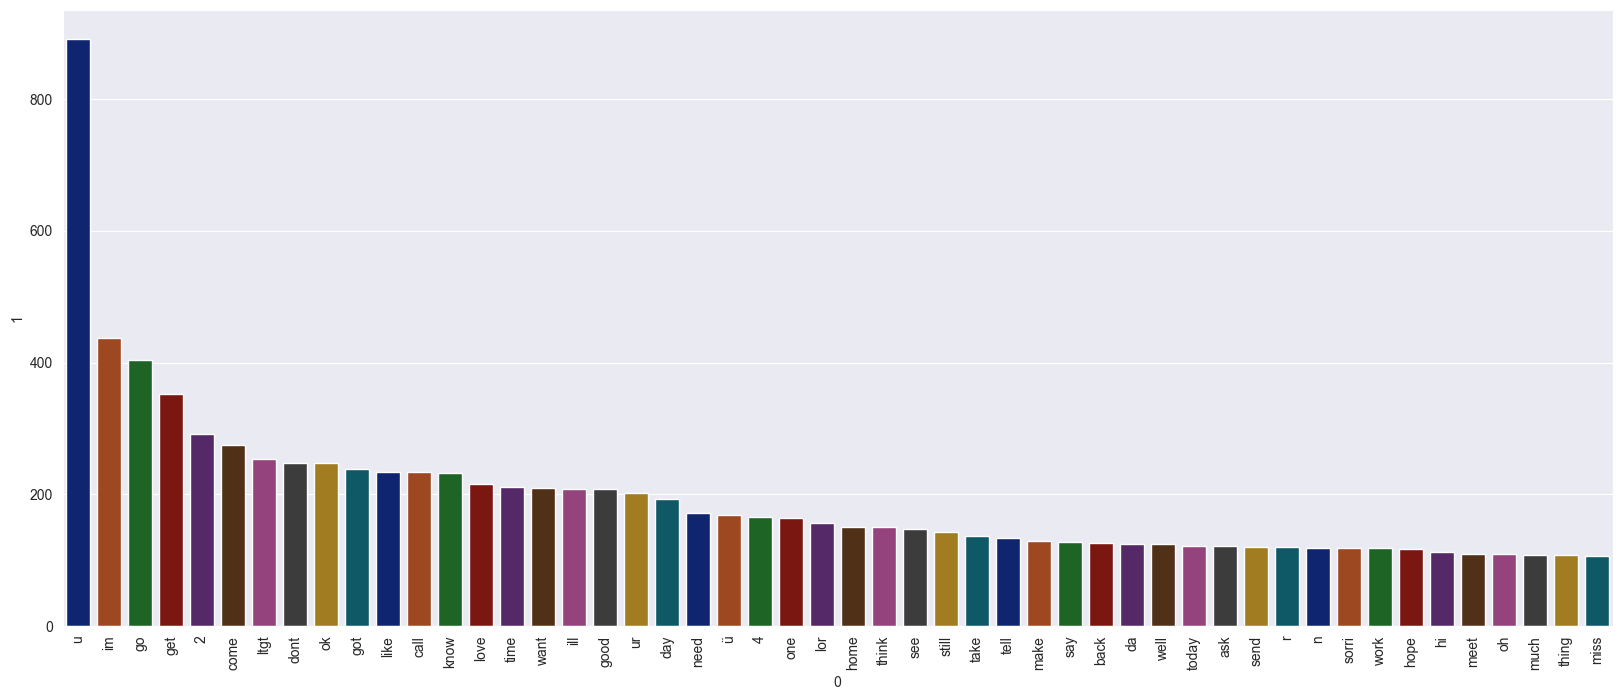

In [31]:
plt.figure(figsize=(20,8))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1],palette='dark')
plt.xticks(rotation=90)
plt.show()

In [32]:
data.head()

,Message,Target
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,u dun say earli hor u c alreadi say,0
4,nah dont think goe usf live around though,0


# Feature Extraction

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['Message']).toarray()

In [34]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
y = data['Target'].values

# Split the data

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Model Building and Evaluation 

In [37]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [38]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Accuracy Score : 0.872093023255814
Precision Score : 0.45662100456621


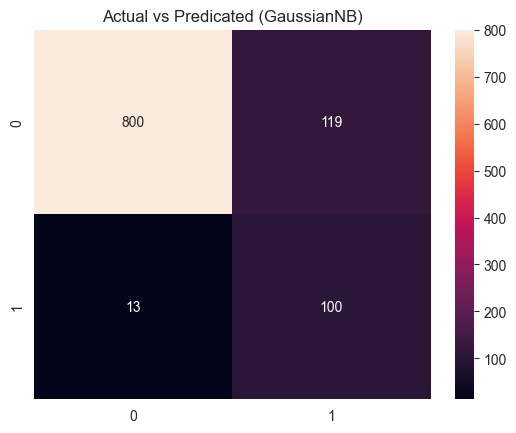

In [39]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred1))
print("Precision Score :", precision_score(y_test,y_pred1))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='d')
plt.title("Actual vs Predicated (GaussianNB)")
plt.show()

Accuracy Score  : 0.9689922480620154
Precision Score : 1.0


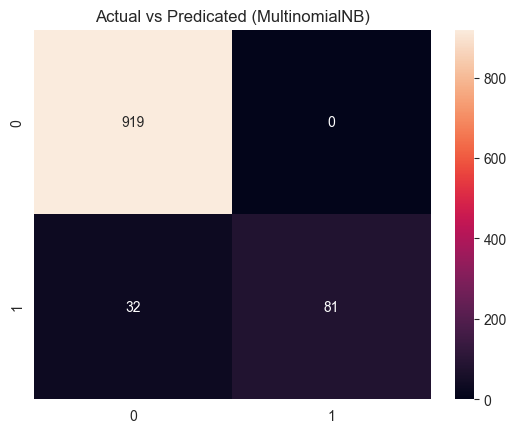

In [40]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score  :" ,accuracy_score(y_test,y_pred2))
print("Precision Score :" ,precision_score(y_test,y_pred2))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='d')
plt.title("Actual vs Predicated (MultinomialNB)")
plt.show()

Accuracy Score  : 0.9709302325581395
Precision Score : 0.9278350515463918


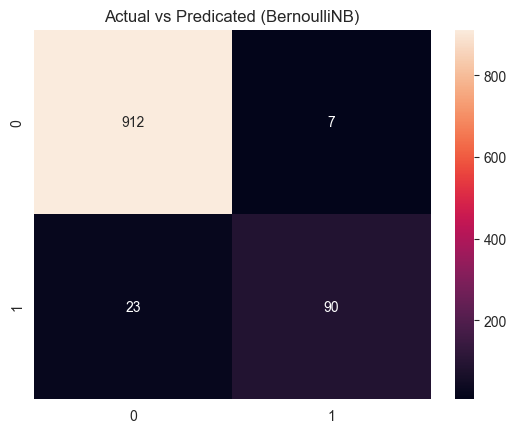

In [41]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score  :" ,accuracy_score(y_test,y_pred3))
print("Precision Score :" ,precision_score(y_test,y_pred3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt='d')
plt.title("Actual vs Predicated (BernoulliNB)")
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [43]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(kernel='sigmoid')

In [44]:
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(accuracy_score(y_test,lr_pred))
print(precision_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))

0.9534883720930233
0.9850746268656716
[[918   1]
 [ 47  66]]


In [45]:
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(accuracy_score(y_test,knn_pred))
print(precision_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

0.9166666666666666
1.0
[[919   0]
 [ 86  27]]


In [46]:
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
print(accuracy_score(y_test,svm_pred))
print(precision_score(y_test,svm_pred))
print(confusion_matrix(y_test,svm_pred))

0.9767441860465116
0.9587628865979382
[[915   4]
 [ 20  93]]


In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print(accuracy_score(y_test,dtc_pred))
print(precision_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))

0.9563953488372093
0.788135593220339
[[894  25]
 [ 20  93]]


In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred))
print(precision_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

0.9748062015503876
0.9887640449438202
[[918   1]
 [ 25  88]]


In [49]:
clfs = {
    'gnb': gnb,
    'mnb': mnb,
    'bnb': bnb,
    'lr': lr,
    'knn':knn,
    'svm':svm,
    'dtc': dtc,
    'rfc':rfc
}

In [50]:
def all_model(clfs,X_train,y_train,X_test,y_test):
    clfs.fit(X_train,y_train)
    pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    return accuracy, precision

In [51]:
all_model(mnb,X_train,y_train,X_test,y_test)

(0.9689922480620154, 1.0)

In [52]:
accuracy_scr = []
precision_scr = []
for name,clf in clfs.items():
    all_accuracy,all_precision = all_model(clf,X_train,y_train,X_test,y_test)
    accuracy_scr.append(all_accuracy)
    precision_scr.append(all_precision)

# Model Selection

In [53]:
pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scr,'Precision':precision_scr}).sort_values('Precision',ascending=False)

,Algorithm,Accuracy,Precision
1,mnb,0.968992,1.000000
4,knn,0.916667,1.000000
7,rfc,0.972868,0.988506
3,lr,0.953488,0.985075
5,svm,0.976744,0.958763
2,bnb,0.970930,0.927835
6,dtc,0.962209,0.830357
0,gnb,0.872093,0.456621


# Ensemble Technique 

In [54]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([
    ('mnb',MultinomialNB()),
    ('knn',KNeighborsClassifier()),
    ('rfc',RandomForestClassifier())
])

In [55]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('knn', KNeighborsClassifier()),
                             ('rfc', RandomForestClassifier())])

In [56]:
vc_pred = vc.predict(X_test)
print(accuracy_score(y_test,vc_pred))
print(precision_score(y_test,vc_pred))
print(confusion_matrix(y_test,vc_pred))

0.9651162790697675
1.0
[[919   0]
 [ 36  77]]


In [57]:
from sklearn.ensemble import StackingClassifier

stc = StackingClassifier([
    ('mnb',MultinomialNB()),
    ('knn',KNeighborsClassifier()),
    ('rfc',RandomForestClassifier())
],final_estimator=RandomForestClassifier())



stc.fit(X_train,y_train)
stc_pred = stc.predict(X_test)
print(accuracy_score(y_test,stc_pred))
print(precision_score(y_test,stc_pred))
print(confusion_matrix(y_test,stc_pred))

0.9796511627906976
0.9423076923076923
[[913   6]
 [ 15  98]]


## <center>We keep Multinomial Naive Bayes Algorithm for predict email is spam or not</center>

In [58]:
# import pickle
# pickle.dump(tfidf,open('tdidf_vecotrizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))